In [ ]:
# Data source: https://figshare.com/collections/Soccer_match_event_dataset/4415000/5

In [47]:
# Players
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
%matplotlib inline


### Load in data

In [90]:
# Competitions Data
df_compet = pd.read_json("data/competitions.json")

# Team Data
df_team = pd.read_json("data/teams.json")
# Create league and format variable
league_col =[]
format_col=[]
for idx,row in df_team.iterrows():
    league_col += [row['area']['name']]
    if row['name'] == row['area']['name']:
        format_col += ['International cup']
    else:
        format_col += ['Domestic league']
df_team['League'] = league_col
df_team['Format'] = format_col

# match data
match_files = glob.glob( "data/matches/*.json")
df_match = pd.read_json("data/matches/matches_England.json")

df_match['eventId'] = df_match.apply(lambda row: row.wyId, axis = 1)



# player data
df_player = pd.read_json("data/players.json")

# event data
event_files = glob.glob( "data/events/*.json")
df_events = pd.read_json(event_files[0])
# for x in range(1,len(all_files)):
#     events = events.append(pd.read_json(all_files[x]))

## Data Overview
### Comptitions (df_compet)
1. name -- League name
2. wyID -- Common dataset identifier. Will probably be used to join with another table.

### Players (df_player)
1. personal details mostly.
2. currentTeamId
3. wyId -- table joining attribute
4. id 
### Teams (df_teams)
1. Nothing really
2. id
### Matches (df_matches)


In [38]:
# Examine Competition Table
df_compet

,name,wyId,format,area,type
0,Italian first division,524,Domestic league,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
1,English first division,364,Domestic league,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,Spanish first division,795,Domestic league,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,French first division,412,Domestic league,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,German first division,426,Domestic league,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
5,European Championship,102,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XEU', 'al...",international
6,World Cup,28,International cup,"{'name': '', 'id': 0, 'alpha3code': 'XWO', 'al...",international


[Text(0, 0, 'England'),
 Text(1, 0, 'Spain'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'Italy'),
 Text(5, 0, 'Wales'),
 Text(6, 0, 'Ireland Republic')]

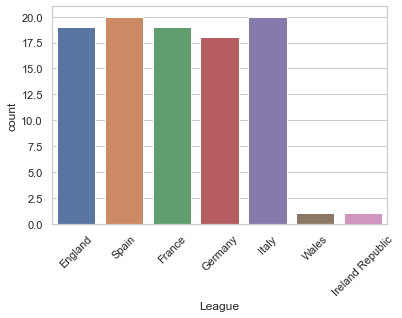

In [87]:
# Examine Team Table
sns.set_theme(style="whitegrid")
# ax = sns.barplot(x = 'League', y = df_team['League'].value_counts(), data = df_team)

team_counts = sns.countplot(x='League', data=df_team[df_team['Format']=='Domestic league'])
team_counts.set_xticklabels(team_counts.get_xticklabels(), rotation=45)

In [110]:
# Examine match table(s) -- honestly not much to see until we join this to another table.

# Code below indicates all the match data is from 2017/2018 season
# df_match['Season'] = df_match.apply(lambda row: row.dateutc.split('-')[0], axis = 1)
# df_match['Season'].value_counts()

df_match.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,eventId,Season
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364,2500089,2018
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364,2500090,2018
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364,2500091,2018
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364,2500092,2018
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364,2500093,2018


In [34]:
# player data
df_players = pd.read_json("data/players.json")
player_cols = ['passportArea','currentTeamId']
print(df_players.shape)
print(df_players.columns)
df_players.head(1)

(3603, 14)
Index(['passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId',
       'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687


In [7]:
df = df_players
# ids= {'id':[],'name':[]}
ids = []
df['playerId'] = df.apply(lambda row: row.passportArea['id'], axis = 1)
df['fullName'] = df.apply(lambda row: row.firstName+" "+row.lastName, axis = 1)
df['playerId'].unique().shape
for idx,row in df.iterrows():
    ids += [row['passportArea']['id']]
#     ids['id'] += [row['passportArea']['id']]
#     ids['name'] += [row['fullName']]
df_players = df


In [12]:

events = pd.read_json(all_files[0])
# for x in range(1,len(all_files)):
#     events = events.append(pd.read_json(all_files[x]))

print(events.shape)
print(events.columns)
events.head(1)

(632807, 12)
Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id'],
      dtype='object')


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119


### - matchId: the identifier of the match the event refers to. The identifier refers to the field "wyId" in the match dataset;

In [15]:
# Join Players and Teams
players_teams = df_players.merge(df_teams,left_on='currentTeamId',right_on='wyId')
players_teams.head()


,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,...,shortName,currentNationalTeamId,playerId,fullName,city,name,wyId_y,officialName,area,type
0,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,M. Sarr,4423,686,Malang Sarr,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",65,Patrick,,Burner,3775,1996-04-11,170,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Martinique', 'id': '474', 'alpha3cod...",...,P. Burner,null,250,Patrick Burner,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
2,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",65,Jean Micha\u00ebl,,Seri,3775,1991-07-19,168,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",...,J. Seri,null,384,Jean Micha\u00ebl Seri,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
3,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",80,Marlon,,Santos da Silva Barbosa,3775,1995-09-07,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Brazil', 'id': '76', 'alpha3code': '...",...,Marlon,null,76,Marlon Santos da Silva Barbosa,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",68,Romain,,Perraud,3775,1997-09-22,173,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",...,R. Perraud,4426,250,Romain Perraud,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,"{'name': 'France', 'id': '250', 'alpha3code': ...",club


In [29]:
# Join Matches and Competition
matches_compet = matches.merge(compet,left_on='wyId', right_on='wyId')

matches_compet.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,groupName,referees,duration,competitionId,eventId,name,format,area,type


In [17]:
# Join Event dataset and Matches dataset

# match_events = events.merge(matches,how='left',on='eventId')
match_events = events.merge(matches, left_on='matchId', right_on='wyId')
print(match_events.shape)
# print(match_events.columns)

# Join Event,Matches dataset with Players dataset 
df = match_events.merge(df_players, left_on='playerId', right_on='wyId')
print(df.shape)

# Join Event, Matches, Players dataset with Teams dataset
df = df.merge(df_teams, left_on='teamId', right_on='wyId')
print(df.shape)

(632807, 28)
(585512, 44)
(585512, 50)


In [20]:
# Find a game with PSG
df_teams = df[df['officialName']=='Paris Saint-Germain FC']
pd.unique(list(df_teams['label']))
# pd.unique(list(df['officialName']))

array(['Angers SCO', 'FC Girondins de Bordeaux', 'FC Nantes',
       'Lille OSC M\\u00e9tropole', 'RC Strasbourg Alsace',
       'Olympique Lyonnais', "O.G.C. Nice C\\u00f4te d'Azur", 'Dijon FCO',
       'Olympique de Marseille', 'FC Metz', 'En Avant Guingamp',
       'AS Monaco FC', 'Toulouse FC', 'Paris Saint-Germain FC',
       'Montpellier HSC', 'Stade Malherbe Caen', 'Amiens SC',
       'Esp\\u00e9rance Sportive Troyes Aube Champagne',
       'AS Saint-\\u00c9tienne', 'Stade Rennais FC'], dtype=object)

In [24]:
df_psg_mars = df[df['label']=='PSG - Olympique Marseille, 3 - 0']
df_psg_mars.columns

Index(['eventId_x', 'subEventName', 'tags', 'playerId_x', 'positions',
       'matchId', 'eventName', 'teamId', 'matchPeriod', 'eventSec',
       'subEventId', 'id', 'status', 'roundId', 'gameweek', 'teamsData',
       'seasonId', 'dateutc', 'winner', 'venue', 'wyId_x', 'label', 'date',
       'groupName', 'referees', 'duration', 'competitionId', 'eventId_y',
       'passportArea', 'weight', 'firstName', 'middleName', 'lastName',
       'currentTeamId', 'birthDate', 'height', 'role', 'birthArea', 'wyId_y',
       'foot', 'shortName', 'currentNationalTeamId', 'playerId_y', 'fullName',
       'city', 'name', 'wyId', 'officialName', 'area', 'type'],
      dtype='object')

In [26]:
print(pd.value_counts(df_psg_mars['eventName']))
print(pd.unique(list(df_psg_mars['eventName'])))
print(pd.unique(list(df_psg_mars['subEventName'])))


Pass                       782
Duel                       358
Others on the ball         111
Free Kick                   88
Foul                        42
Shot                        24
Save attempt                 9
Offside                      5
Goalkeeper leaving line      2
Name: eventName, dtype: int64
['Pass' 'Duel' 'Shot' 'Free Kick' 'Foul' 'Others on the ball' 'Offside'
 'Save attempt' 'Goalkeeper leaving line']
['Simple pass' 'High pass' 'Ground loose ball duel'
 'Ground defending duel' 'Shot' 'Free Kick' 'Ground attacking duel' 'Foul'
 'Touch' 'Clearance' 'Cross' 'Head pass' 'Air duel' 'Smart pass'
 'Throw in' 'Corner' 'Launch' 'Acceleration' '' 'Free kick cross'
 'Out of game foul' 'Hand pass' 'Goal kick' 'Reflexes' 'Save attempt'
 'Late card foul' 'Goalkeeper leaving line']


# Visualizations
- TODO: 
1. Create a pitch plot thats fit our given datasets x/y coordinates  

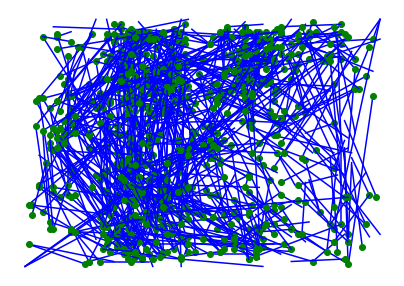

In [28]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Tidy Axes
plt.axis('off')

pass_cols = ['Simple pass','High pass','Smart pass']
goal_cols = ['Shot']
for idx,row in df_psg_mars.iterrows():
    positions = row.positions
#     print(row['fullName'])
#     break
#     if row['subEventName'] in pass_cols:
    
#     if row['name'] == 'PSG' and row['fullName']=='Neymar da Silva Santos Junior':
    if row['eventName'] == 'Pass':
        Xstart = positions[0]['x']
        Ystart = positions[0]['y']
        Xend = positions[1]['x']
        Yend = positions[1]['y']
        plt.plot([int(Xstart),int(Xend)],
                 [int(Ystart),int(Yend)], 
                 color="blue")
        plt.plot(int(Xstart),int(Ystart),"o", color="green")
#     if row['eventName'] == 'Shot':
#         Xstart = positions[0]['x']
#         Ystart = positions[0]['y']
#         Xend = positions[1]['x']
#         Yend = positions[1]['y']
#         plt.plot([int(Xstart),int(Xend)],
#                  [int(Ystart),int(Yend)], 
#                  color="yellow")
#             
            

        

#Display Pitch
plt.show()


In [ ]:
# #Pitch Outline & Centre Line
# plt.plot([0,0],[0,90], color="black")
# plt.plot([0,130],[90,90], color="black")
# plt.plot([130,130],[90,0], color="black")
# plt.plot([130,0],[0,0], color="black")
# plt.plot([65,65],[0,90], color="black")

# #Left Penalty Area
# plt.plot([16.5,16.5],[65,25],color="black")
# plt.plot([0,16.5],[65,65],color="black")
# plt.plot([16.5,0],[25,25],color="black")

# #Right Penalty Area
# plt.plot([130,113.5],[65,65],color="black")
# plt.plot([113.5,113.5],[65,25],color="black")
# plt.plot([113.5,130],[25,25],color="black")

# #Left 6-yard Box
# plt.plot([0,5.5],[54,54],color="black")
# plt.plot([5.5,5.5],[54,36],color="black")
# plt.plot([5.5,0.5],[36,36],color="black")

# #Right 6-yard Box
# plt.plot([130,124.5],[54,54],color="black")
# plt.plot([124.5,124.5],[54,36],color="black")
# plt.plot([124.5,130],[36,36],color="black")

# #Prepare Circles
# centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
# centreSpot = plt.Circle((65,45),0.8,color="black")
# leftPenSpot = plt.Circle((11,45),0.8,color="black")
# rightPenSpot = plt.Circle((119,45),0.8,color="black")

# #Draw Circles
# ax.add_patch(centreCircle)
# ax.add_patch(centreSpot)
# ax.add_patch(leftPenSpot)
# ax.add_patch(rightPenSpot)

# #Prepare Arcs
# leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
# rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

# #Draw Arcs
# ax.add_patch(leftArc)
# ax.add_patch(rightArc)